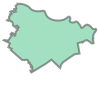

In [20]:
import urllib
import requests
from urllib import parse
from urllib import request
import pandas as pd
import json

keywords = '津南区'
my_key = '4441e8be424f54009e1ca2cf18d058ff'
#接口地址
url = 'https://restapi.amap.com/v3/config/district?'
#查询条件 parameters
'''
subdistrict取值：
0：不返回下级行政区；

1：返回下一级行政区；

2：返回下两级行政区；

3：返回下三级行政区；
'''
dict = {
    'key' : my_key,
    'keywords' : keywords,
    'subdistrict' : '1',
    'extensions' : 'all'
}

url_data = parse.urlencode(dict)
address = url + url_data

def get_html(url):
    # 创建访问器
    request = urllib.request.Request(url)
    # 访问网页
    response = urllib.request.urlopen(request)
    # 读取网页内容
    webpage = response.read()
    return webpage

webpage = get_html(address)
# 用json解析
data = json.loads(webpage.decode('utf-8', 'ignore'))

polyline = data['districts'][0]['polyline']
polyline = polyline.split(';')
p = []
for i in polyline:
    a, b = i.split(',')
    p.append([float(a), float(b)])
    
Polygon(p)

In [23]:
import geopandas
from shapely.geometry import Polygon
geodata = pd.DataFrame([data['districts'][0]])

In [24]:
geodata['geometry'] = [Polygon(p)]

In [26]:
geodata

,citycode,adcode,name,polyline,center,level,districts,geometry
0,022,120112,津南区,"117.26729,39.039449;117.267181,39.039728;117.2...","117.356683,38.936971",district,"[{'citycode': '022', 'adcode': '120112', 'name...","POLYGON ((117.26729 39.039449, 117.267181 39.0..."


In [27]:
type(geodata)

pandas.core.frame.DataFrame

In [28]:
geodata = geopandas.GeoDataFrame(geodata)

In [29]:
type(geodata)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

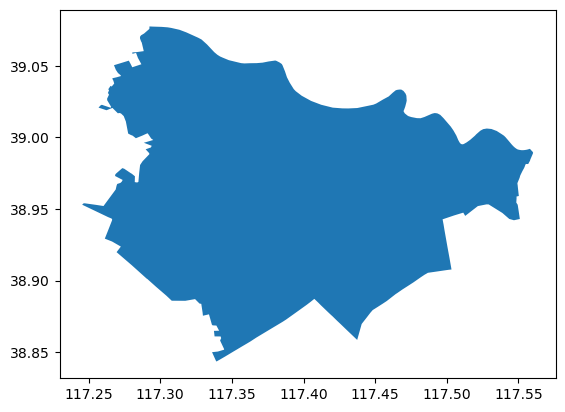

In [30]:
geodata.plot()

In [31]:
geodata = geodata.drop(['polyline', 'districts'], axis = 1)
geodata.to_file(r'津南区')

In [32]:
# 如果要保存为GeoJSON格式
geodata.to_file(r'津南区.json', driver = 'GeoJSON')